# Import Libraries

In [1]:
import pandas as pd
import os
import plotly.figure_factory as ff
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [2]:
curr_dir_path = os.path.dirname(os.path.abspath('preprocessing.ipynb'))
processed_data_path = os.path.join(curr_dir_path, './../data/processed_data/')
final_data_path = os.path.join(curr_dir_path, './../data/final_data/')

# Load Dataset

In [3]:
full_final_df = pd.read_csv(final_data_path + 'full_final_df.csv')
full_final_df

,GEO_ID,County,State,FIPS,Population,RADI,RUCC,IRR,SVI,Premature Mortality,...,No High School_z,No Vehicle_z,Housing Cost Burden_z,Ratio of Population to Primary Care Physicians_z,Unemployment_z,Uninsured_z,Long Commutes_z,Drinking Water Violations_z,Natural Disaster Risk_z,Food Insecurity_z
0,0500000US45001,Abbeville,SC,45001,24356.0,41.368456,6,0.510533,0.5988,564.941382,...,0.084183,-0.226504,-0.094071,-0.464583,-0.037080,0.214339,1.096177,1.342678,-0.256835,-0.996479
1,0500000US51001,Accomack,VA,51001,33191.0,38.890613,9,0.502257,0.8597,536.960650,...,-0.797731,0.386642,0.298276,-0.112158,-0.497592,0.245101,-0.588819,1.342678,1.714967,-0.968102
2,0500000US21001,Adair,KY,21001,19067.0,40.573009,7,0.537279,0.6026,540.498014,...,-0.881155,-0.187727,-0.621773,0.285058,0.483334,-0.885138,-0.438845,-0.744780,-0.357953,0.167006
3,0500000US29001,Adair,MO,29001,25165.0,45.444244,7,0.525863,0.4006,473.632065,...,-1.393618,0.041271,0.438854,-0.971618,-0.716574,0.313385,-1.356330,1.342678,0.241356,-0.060015
4,0500000US40001,Adair,OK,40001,19576.0,70.904987,8,0.526157,0.9472,722.921916,...,-0.368692,0.829049,0.062380,0.322751,-0.438766,1.615693,0.619790,-0.744780,0.811070,1.245359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0500000US37199,Yancey,NC,37199,18811.0,40.206755,8,0.521231,0.5307,457.539735,...,0.715823,-0.306505,-0.073455,-0.528696,-0.258977,0.432162,0.566859,-0.744780,-1.186628,0.138629
1206,0500000US46135,Yankton,SD,46135,23373.0,10.841175,7,0.529090,0.2014,350.690216,...,-1.048004,-0.304128,-1.364377,-0.815874,-1.617767,-0.180302,-1.912114,-0.744780,0.827101,-1.564033
1207,0500000US36123,Yates,NY,36123,24451.0,34.386083,6,0.510243,0.5724,338.097110,...,0.918425,2.129688,0.336515,-0.393449,-0.754014,-0.327434,-0.050679,1.342678,-0.863543,-1.195123
1208,0500000US48505,Zapata,TX,48505,13849.0,90.321125,6,0.565705,0.9968,502.735785,...,0.906507,0.842538,0.307468,0.446362,2.314472,2.885644,-0.976985,1.342678,-0.869709,2.777755


In [4]:
full_final_df.columns

Index(['GEO_ID', 'County', 'State', 'FIPS', 'Population', 'RADI', 'RUCC',
       'IRR', 'SVI', 'Premature Mortality', 'Infant Mortality',
       'Preventable Hospital Stays', 'Heart Disease Mortality',
       'Poor or Fair Health', 'Median Income', 'No Internet', 'No College',
       'Ratio of Mental Health Providers to Population', 'Percent Non-White',
       'Poverty', 'No Plumbing Facilities', '65+', 'No High School',
       'No Vehicle', 'Housing Cost Burden',
       'Ratio of Population to Primary Care Physicians', 'Unemployment',
       'Uninsured', 'Long Commutes', 'Drinking Water Violations',
       'Natural Disaster Risk', 'Food Insecurity', 'Median Income_z',
       'No Internet_z', 'No College_z',
       'Ratio of Mental Health Providers to Population_z',
       'Percent Non-White_z', 'Poverty_z', 'No Plumbing Facilities_z', '65+_z',
       'No High School_z', 'No Vehicle_z', 'Housing Cost Burden_z',
       'Ratio of Population to Primary Care Physicians_z', 'Unemployment_z'

In [10]:
counties = gpd.read_file("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json")

In [11]:
counties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.7179 32.4028..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.5778 33.76532, -86.75914 33.8406..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87052, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.5817, -88.13925 34.5878..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.2251 37.23487, -81.20477 37.2430..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.9683 37.5378, -81.92787 37.51212..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.0794, -78.49303 36.8912..."


In [18]:
county_map_df = pd.DataFrame({
    'fips': full_final_df['FIPS'],
    'RADI': full_final_df['RADI'],
    'SVI': full_final_df['SVI'],
    'RUCC': full_final_df['RUCC']
})

county_map_df['fips'] = county_map_df['fips'].astype(str).str.zfill(5)

In [19]:
counties['id'] = counties['id'].astype(str).str.zfill(5)

county_map_df = counties[['id', 'geometry']].merge(county_map_df, left_on='id', right_on='fips')
county_map_df

,id,geometry,fips,RADI,SVI,RUCC
0,01017,"POLYGON ((-85.18413 32.87052, -85.12342 32.772...",01017,43.694387,0.8295,6
1,01045,"POLYGON ((-85.41644 31.61947, -85.41743 31.314...",01045,40.778154,0.7766,4
2,01099,"POLYGON ((-86.9059 31.75304, -87.05228 31.7167...",01099,66.952636,0.7416,8
3,01121,"POLYGON ((-86.17437 33.10439, -86.22627 33.104...",01121,44.401435,0.9080,4
4,05141,"POLYGON ((-92.85062 35.46295, -92.81342 35.549...",05141,57.613214,0.7763,8
...,...,...,...,...,...,...
1205,50027,"POLYGON ((-72.77154 43.47786, -72.79107 43.495...",50027,17.591766,0.1499,7
1206,51001,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...",51001,38.890613,0.8597,9
1207,51021,"POLYGON ((-81.2251 37.23487, -81.20477 37.2430...",51021,36.489383,0.0974,8
1208,51027,"POLYGON ((-81.9683 37.5378, -81.92787 37.51212...",51027,64.058828,0.5975,9


# Mapping

## Color Definition

In [ ]:
purple_cmap = LinearSegmentedColormap.from_list("white_to_purple", ["#efefef", "#413584"])  # purple to white

## RADI

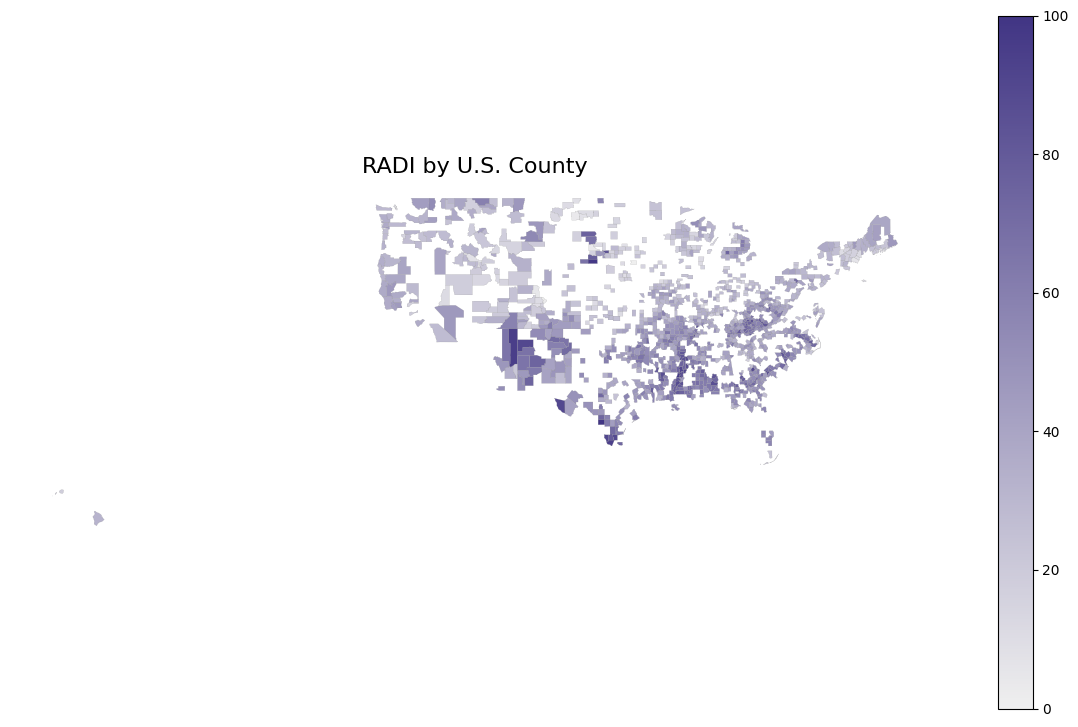

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
county_map_df.plot(column='RADI', cmap=purple_cmap, linewidth=0.1, ax=ax, edgecolor='0.5', legend=True)
ax.set_title('RADI by U.S. County', fontsize=16)
ax.axis('off')
plt.show()

## SVI

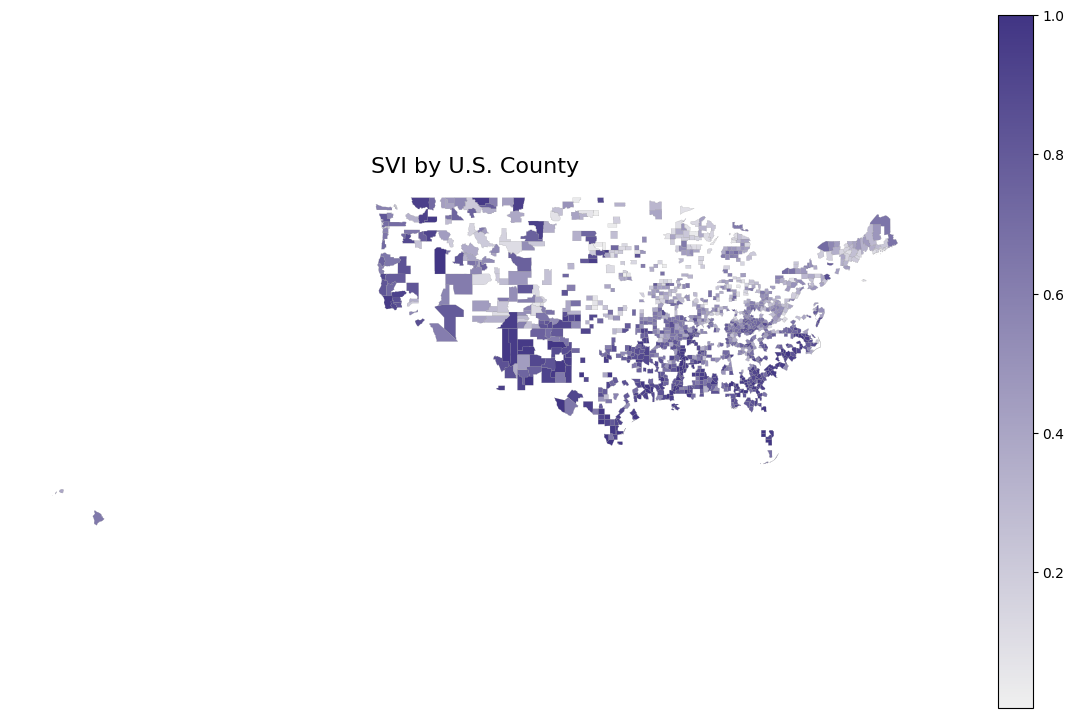

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
county_map_df.plot(column='SVI', cmap=purple_cmap, linewidth=0.1, ax=ax, edgecolor='0.5', legend=True)
ax.set_title('SVI by U.S. County', fontsize=16)
ax.axis('off')
plt.show()

## RUCC

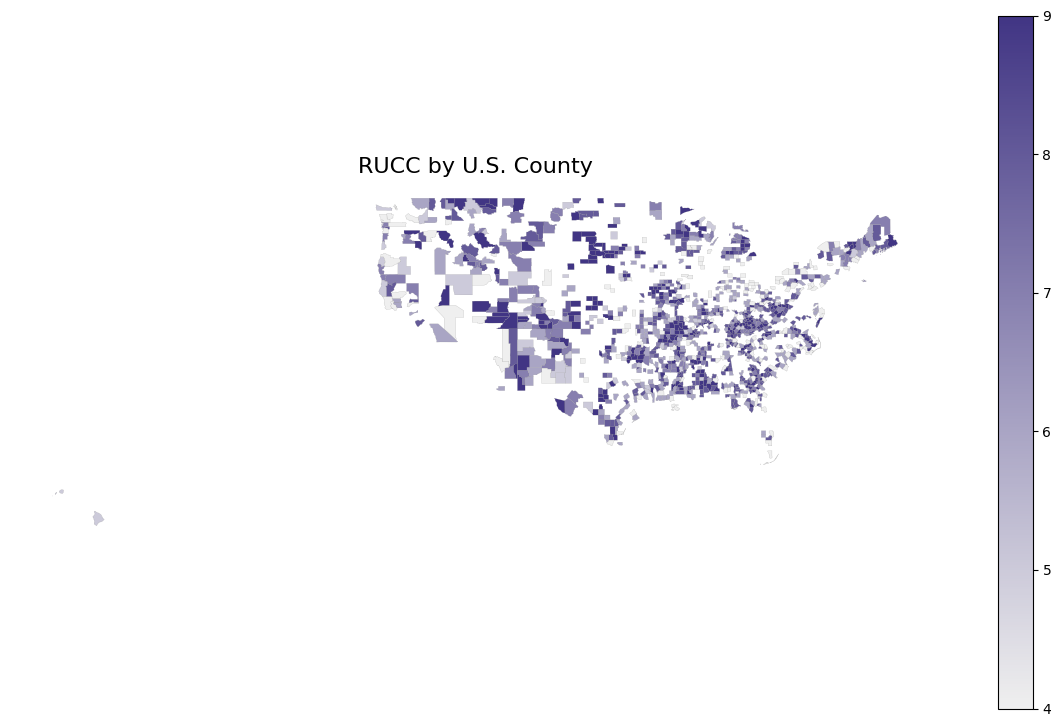

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
county_map_df.plot(column='RUCC', cmap=purple_cmap, linewidth=0.1, ax=ax, edgecolor='0.5', legend=True)
ax.set_title('RUCC by U.S. County', fontsize=16)
ax.axis('off')
plt.show()